In [1]:
from autograd import *
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import tensorflow as tf
import torch
%matplotlib inline

[567.01110069]
0.9999997331412641


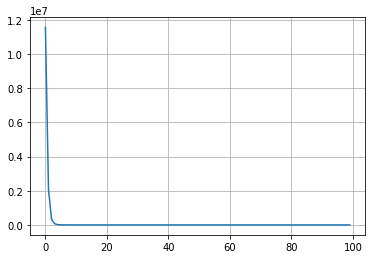

In [2]:
np.random.seed(0)
X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)

X = TensorData(X)
Y = TensorData(Y.reshape((-1, 1)))
W = TensorData(np.random.laplace(0, 0.3, size=(10, 1)))

# 1
story_loss = []
for i in range(100):
    r = ((X.dot(W) - Y) ** 2).sum(0)
    story_loss.append(r.forward())
    r.bprop()
    W.data -= W.gradient * 0.001
    W.gradient *= 0.1
print(sum(abs(W.data)))
print(1 - ((X.dot(W).forward() - Y.forward()) ** 2).mean() / ((Y.forward() - Y.forward().mean()) ** 2).mean())
plt.plot(story_loss)
plt.grid()

[547.26996541]
0.9987728812136957


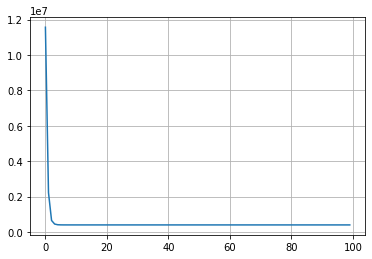

In [4]:
np.random.seed(0)
X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)

X = TensorData(X)
Y = TensorData(Y.reshape((-1, 1)))
W = TensorData(np.random.laplace(0, 0.3, size=(10, 1)))

# 2 Ridge
story_loss = []
for i in range(100):
    r = ((X.dot(W) - Y) ** 2).sum(0) + (W ** 2).sum(0) * 10
    story_loss.append(r.forward())
    r.bprop()
    W.data -= W.gradient * 0.001
    W.gradient *= 0.1
print(sum(abs(W.data)))
print(1 - ((X.dot(W).forward() - Y.forward()) ** 2).mean() / ((Y.forward() - Y.forward().mean()) ** 2).mean())
plt.plot(story_loss)
plt.grid()

[518.41535862]
0.9940269860645246


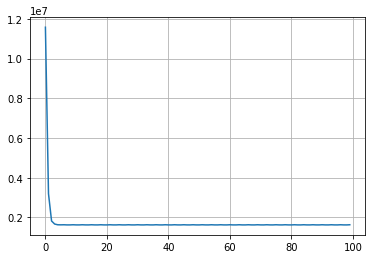

In [5]:
np.random.seed(0)
X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)

X = TensorData(X)
Y = TensorData(Y.reshape((-1, 1)))
W = TensorData(np.random.laplace(0, 0.3, size=(10, 1)))

# 2 Lasso
story_loss = []
for i in range(100):
    r = ((X.dot(W) - Y) ** 2).sum(0) + abs(W).sum(0) * 3000
    story_loss.append(r.forward())
    r.bprop()
    W.data -= W.gradient * 0.001
    W.gradient *= 0.1
print(sum(abs(W.data)))
print(1 - ((X.dot(W).forward() - Y.forward()) ** 2).mean() / ((Y.forward() - Y.forward().mean()) ** 2).mean())
plt.plot(story_loss)
plt.grid()

Tensorflow
===

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


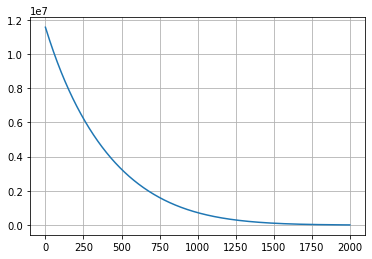

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import tensorflow as tf
%matplotlib inline

X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)
learning_rate = 0.08
n_steps = 2 * 10 ** 3
story_loss = []

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (None, 10), name='x')
    y = tf.placeholder(tf.float32, (None, 1), name='y')
with tf.name_scope('weights'):
    W = tf.Variable(tf.random_normal((10, 1), dtype=tf.float32), name='weights')
    b = tf.Variable(tf.random_normal((1, 1), dtype=tf.float32), name='bias')
with tf.name_scope('prediction'):
    y_pred = x @ W + b
with tf.name_scope('loss'):
    l = tf.reduce_sum((y - y_pred) ** 2)
with tf.name_scope('optim'):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)
with tf.name_scope('summaries'):
    tf.summary.scalar('loss', l)
    merged = tf.summary.merge_all()
    
# train_writer = tf.summary.FileWriter('./tmp/lr-train', tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(n_steps):
        feed_dict = {x:X, y:Y.reshape((-1, 1))}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        story_loss.append(loss)
#         train_writer.add_summary(summary, i)
    weights = sess.run(W)
    bias = sess.run(b)
plt.plot(story_loss)
plt.grid()

In [2]:
predict = X @ weights + bias
1 - ((predict - Y.reshape((-1, 1))) ** 2).mean() / ((Y - Y.mean()) ** 2).mean()

0.9991854408979057

In [6]:
weights.sum() + bias[0][0]

554.8864

Ridge L2
===

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


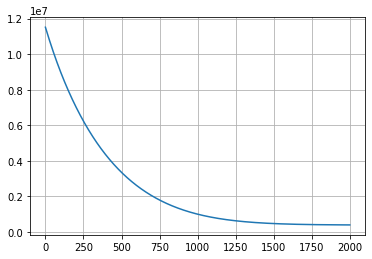

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import tensorflow as tf
%matplotlib inline

X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)
learning_rate = 0.08
n_steps = 2 * 10 ** 3
story_loss = []

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (None, 10), name='x')
    y = tf.placeholder(tf.float32, (None, 1), name='y')
with tf.name_scope('weights'):
    W = tf.Variable(tf.random_normal((10, 1), dtype=tf.float32), name='weights')
    b = tf.Variable(tf.random_normal((1, 1), dtype=tf.float32), name='bias')
with tf.name_scope('prediction'):
    y_pred = x @ W + b
with tf.name_scope('loss'):
    l = tf.reduce_sum((y - y_pred) ** 2) + tf.reduce_sum(W ** 2) * 10
with tf.name_scope('optim'):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)
with tf.name_scope('summaries'):
    tf.summary.scalar('loss', l)
    merged = tf.summary.merge_all()
    
# train_writer = tf.summary.FileWriter('./tmp/lr-train', tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(n_steps):
        feed_dict = {x:X, y:Y.reshape((-1, 1))}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        story_loss.append(loss)
#         train_writer.add_summary(summary, i)
    weights = sess.run(W)
    bias = sess.run(b)
plt.plot(story_loss)
plt.grid()

In [2]:
weights.sum() + bias[0][0]

537.16833

Lasso L1
===

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


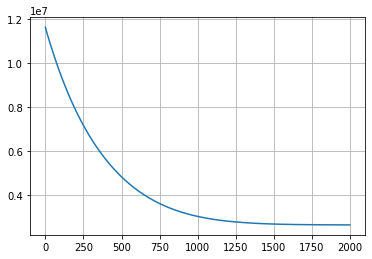

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import tensorflow as tf
%matplotlib inline

X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)
learning_rate = 0.08
n_steps = 2 * 10 ** 3
story_loss = []

with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (None, 10), name='x')
    y = tf.placeholder(tf.float32, (None, 1), name='y')
with tf.name_scope('weights'):
    W = tf.Variable(tf.random_normal((10, 1), dtype=tf.float32), name='weights')
    b = tf.Variable(tf.random_normal((1, 1), dtype=tf.float32), name='bias')
with tf.name_scope('prediction'):
    y_pred = x @ W + b
with tf.name_scope('loss'):
    l = tf.reduce_sum((y - y_pred) ** 2) + tf.reduce_sum(abs(W)) * 5000
with tf.name_scope('optim'):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(l)
with tf.name_scope('summaries'):
    tf.summary.scalar('loss', l)
    merged = tf.summary.merge_all()
    
# train_writer = tf.summary.FileWriter('./tmp/lr-train', tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(n_steps):
        feed_dict = {x:X, y:Y.reshape((-1, 1))}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        story_loss.append(loss)
#         train_writer.add_summary(summary, i)
    weights = sess.run(W)
    bias = sess.run(b)
plt.plot(story_loss)
plt.grid()

In [2]:
weights.sum() + bias[0][0]

478.09677

torch
===

Simple Linear Regression
===

0.9999997615814209


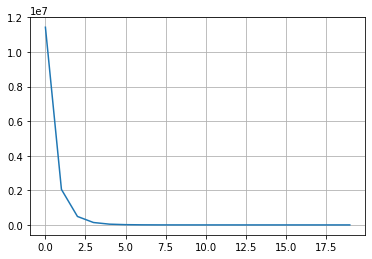

In [38]:
np.random.seed(0)
X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)
W = torch.rand(10, 1, requires_grad=True)
data = torch.Tensor(X)
target = torch.Tensor(Y)

loss_story = []
for i in range(20):
    loss = (((data @ W).squeeze() - target) ** 2).sum()
    loss_story.append(loss.item())
    loss.backward()
    W.data -= W.grad * 0.001
    W.grad *= 0.001
    
plt.plot(loss_story)
plt.grid()

predict = (data @ W).squeeze()
print((1 - ((predict - target) ** 2).mean() / ((target - target.mean()) ** 2).mean()).item())

Ridge Regression  L2
===

0.9767476320266724


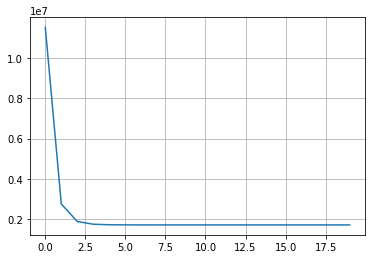

In [47]:
np.random.seed(0)
X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)
W = torch.rand(10, 1, requires_grad=True)
data = torch.Tensor(X)
target = torch.Tensor(Y)

loss_story = []
for i in range(20):
    loss = (((data @ W).squeeze() - target) ** 2).sum() + (W ** 2).sum() * 50
    loss_story.append(loss.item())
    loss.backward()
    W.data -= W.grad * 0.001
    W.grad *= 0.001
    
plt.plot(loss_story)
plt.grid()

predict = (data @ W).squeeze()
print((1 - ((predict - target) ** 2).mean() / ((target - target.mean()) ** 2).mean()).item())

Lasso Linear   L1
===

0.9998046159744263


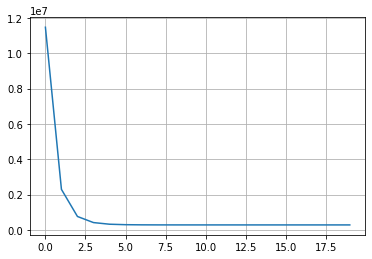

In [45]:
np.random.seed(0)
X, Y = make_regression(n_samples=300, n_features=10, n_informative=10, noise=0.1, random_state=0, coef=False)
W = torch.rand(10, 1, requires_grad=True)
data = torch.Tensor(X)
target = torch.Tensor(Y)

loss_story = []
for i in range(20):
    loss = (((data @ W).squeeze() - target) ** 2).sum() + abs(W).sum() * 500
    loss_story.append(loss.item())
    loss.backward()
    W.data -= W.grad * 0.001
    W.grad *= 0.001
    
plt.plot(loss_story)
plt.grid()

predict = (data @ W).squeeze()
print((1 - ((predict - target) ** 2).mean() / ((target - target.mean()) ** 2).mean()).item())

---